In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from sklearn.metrics import accuracy_score
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn import datasets
from sklearn.model_selection import train_test_split

Load the iris dataSet

In [110]:
data = datasets.load_iris()

Create variables to divide into 3 parts for creating different models consisting of -
1 ) Petal features 
2 ) Sepal features 
3 ) All features

In [111]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [112]:
petal_data = data.data[:, 2:4]
sepal_data = data.data[:, :2]
all_data= data.data

#  target 
y = data.target

Spit the data into training and testing 

In [113]:
# Split the dataset into training and test sets
X_train_all, X_test_all, y_train, y_test = train_test_split(all_data, y, test_size=0.1, random_state=42)
X_train_petal, X_test_petal, _, _ = train_test_split(petal_data, y, test_size=0.1, random_state=42)
X_train_sepal, X_test_sepal, _, _ = train_test_split(sepal_data, y, test_size=0.1, random_state=42)


In [114]:
class LogisticRegression:

    def gradient_descent(self, X, Y, max_iter=1000, eta=0.1, mu=0.0001):
        self.Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
        self.W = np.zeros((X.shape[1], self.Y_onehot.shape[1]))
        self.b = 0
        step = 0
        self.W_lst = []
        
        
        while step < max_iter:
            step += 1
            Z = - X @ self.W + self.b
            P = softmax(Z, axis=1)
            N = X.shape[0]
            gw = 1/N * (X.T @ (self.Y_onehot - P)) + 2 * mu * self.W
            gb = 1/N * np.sum(self.Y_onehot - P) + 2 * mu * self.b
            self.W -= eta * gw
            self.b -= eta * gb
            self.W_lst.append(self.W)
        return self.W, self.b

    def fit(self, X, Y):
            self.W, self.b = self.gradient_descent(X, Y)

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)
    

In [115]:
model = LogisticRegression()
model.fit(X_train_petal, y_train)

c:\Users\nehap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


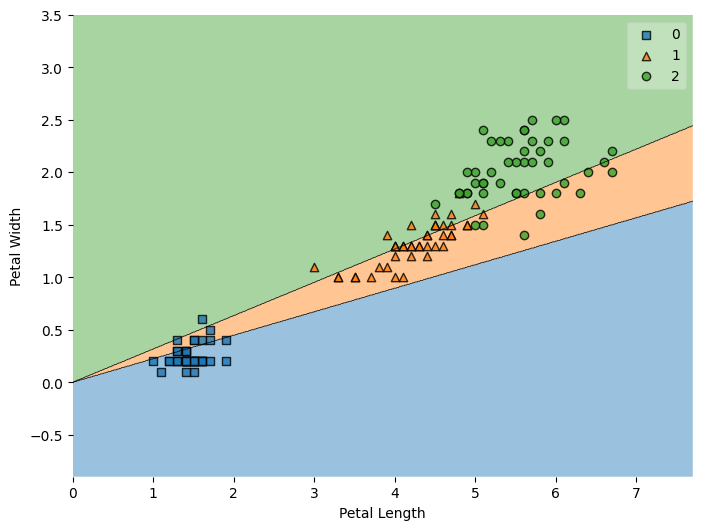

Accuracy:  0.7333333333333333


In [116]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X_train_petal, y_train, clf=model)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()
y_pred_for_petal = model.predict(X_test_petal)
acc_for_petal = accuracy_score(y_test, y_pred_for_petal)
print("Accuracy: " ,acc_for_petal)

In [117]:
model2= LogisticRegression()
model2.fit(X_train_sepal, y_train)

c:\Users\nehap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


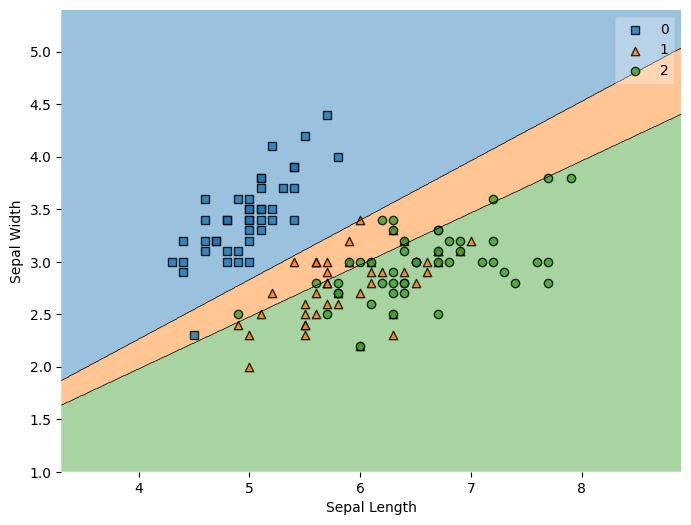

Accuracy:  0.6666666666666666


In [118]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X_train_sepal, y_train, clf=model2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
y_pred_for_sepal = model2.predict(X_test_sepal)
acc_for_sepal = accuracy_score(y_test, y_pred_for_sepal)
print("Accuracy: " ,acc_for_sepal)

In [119]:
model3 = LogisticRegression()
model3.fit(X_train_all, y_train)
y_pred_for_all = model3.predict(X_test_all)
acc_for_all = accuracy_score(y_test, y_pred_for_all)
print("Accuracy: " ,acc_for_all)

Accuracy:  1.0


c:\Users\nehap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [121]:
class LDA:
    def __init__(self):
        self.priors = None
        self.means = None
        self.covariance = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes)

        self.priors = np.zeros(n_classes)
        self.means = np.zeros((n_classes, n_features))
        self.covariance = np.zeros((n_features, n_features))

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            n_c = X_c.shape[0]
            self.priors[i] = n_c / n_samples
            self.means[i, :] = X_c.mean(axis=0)
            self.covariance += (X_c - self.means[i, :]).T @ (X_c - self.means[i, :])

        self.covariance /= n_samples - n_classes

    def predict(self, X):
        n_samples, n_features = X.shape
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            posteriors = []

            for j, c in enumerate(self.classes):
                prior = np.log(self.priors[j])
                mean = self.means[j, :]
                covariance = self.covariance
                likelihood = -0.5 * (X[i, :] - mean) @ np.linalg.inv(covariance) @ (X[i, :] - mean).T
                posterior = prior + likelihood
                posteriors.append(posterior)

            y_pred[i] = self.classes[np.argmax(posteriors)]

        return y_pred
    
    def plot_decision_regions(self, X, y):
        plot_decision_regions(X, y, clf=self, legend=2)
        plt.xlabel('length [cm]')
        plt.ylabel('width [cm]')
        plt.title('LDA on Iris')
        plt.show()

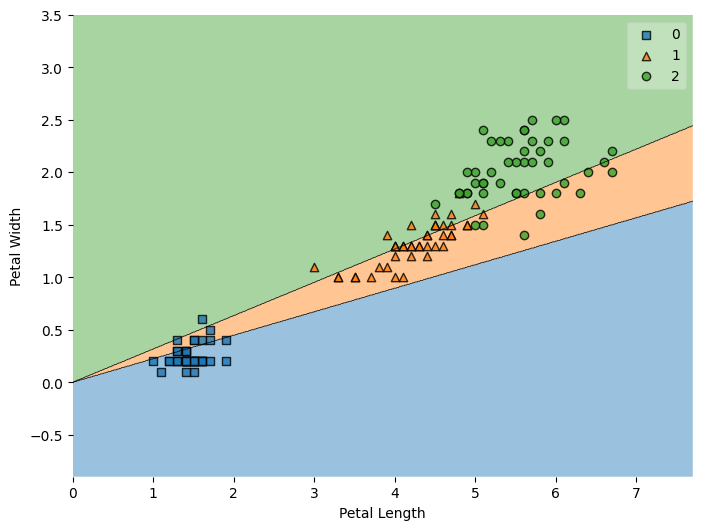

Accuracy:  1


In [123]:
import math
model0 = LDA()
model0.fit(X_train_petal,y_train)
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X_train_petal, y_train, clf=model)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

y_pred_for_petal = model0.predict(X_test_petal)
acc_for_petal = accuracy_score(y_test, y_pred_for_petal)
print("Accuracy: ", math.floor(acc_for_petal))